In [19]:
# Gene Expression Problem
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [ ]:
# Load the data
data_path = '/Users/jake/ML/data.csv'
labels_path = '/Users/jake/ML/labels.csv'

# Load the data with the first column as index
data = pd.read_csv(data_path, index_col=0)
labels = pd.read_csv(labels_path, index_col=0)

# Merge the data and labels dataframes based on their indices
merged_df = data.merge(labels, left_index=True, right_index=True)

# Display the merged dataframe
print(merged_df.head())

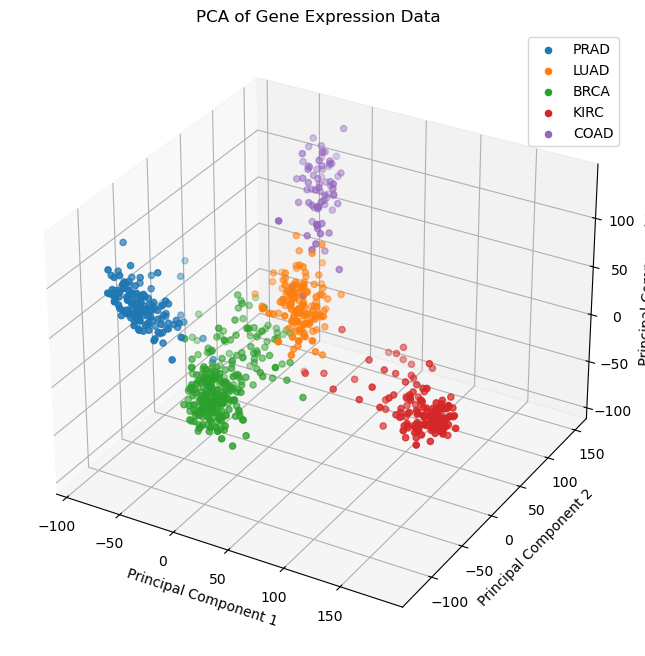

In [3]:
# Separate the features (genes) from the labels
features = merged_df.drop(columns=['Class'])
labels = merged_df['Class']

# Apply PCA to the features
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Class'] = labels.values

# Plot the first three components
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three principal components
for class_label in pca_df['Class'].unique():
    indices_to_keep = pca_df['Class'] == class_label
    ax.scatter(pca_df.loc[indices_to_keep, 'PC1'],
               pca_df.loc[indices_to_keep, 'PC2'],
               pca_df.loc[indices_to_keep, 'PC3'],
               label=class_label)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.title('PCA of Gene Expression Data')
plt.show()

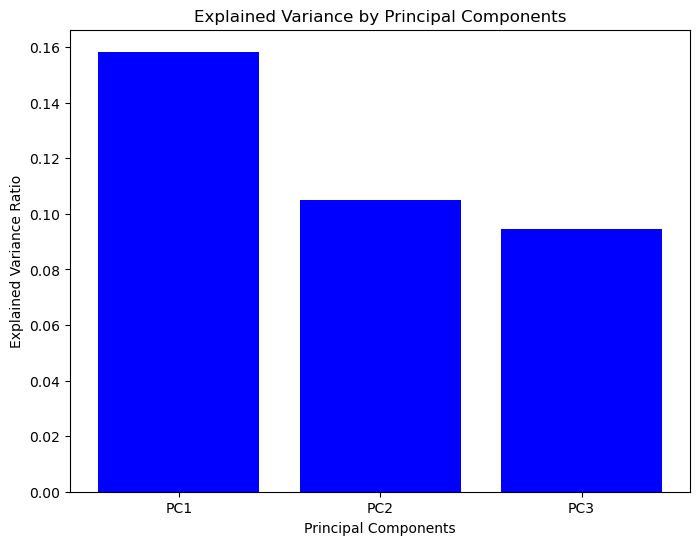

array([0.1583855 , 0.1050396 , 0.09472221])

In [5]:
# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(['PC1', 'PC2', 'PC3'], explained_variance, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

explained_variance

The PCA object was fitted to the data, and the explained_variance_ratio_ attribute contains the explained variance ratios for the principal components. This attribute is derived from the eigenvalues obtained during the eigenvalue decomposition of the covariance matrix. For this problem, the explained variance ratios were: PC1: 15.84%, PC2: 10.50%, and PC3: 9.47% These values mean that PC1 accounts for 15.84% of the total variance in the data, PC2 accounts for 10.50%, and PC3 accounts for 9.47%. Together, they account for approximately 35.81% of the total variance.

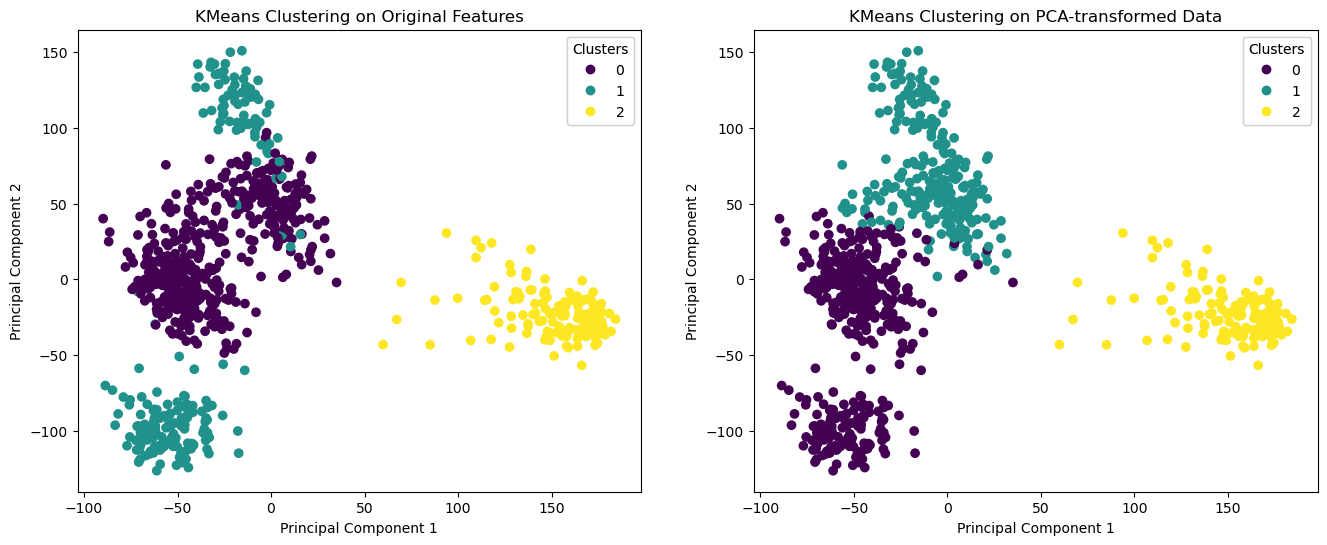

In [15]:
# KMeans on original features
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(features)

# KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(principal_components)

# Plotting KMeans on original features
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

scatter = ax[0].scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_original, cmap='viridis')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend1)
ax[0].set_title('KMeans Clustering on Original Features')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plotting KMeans on PCA-transformed data
scatter = ax[1].scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_pca, cmap='viridis')
legend2 = ax[1].legend(*scatter.legend_elements(), title="Clusters")
ax[1].add_artist(legend2)
ax[1].set_title('KMeans Clustering on PCA-transformed Data')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()


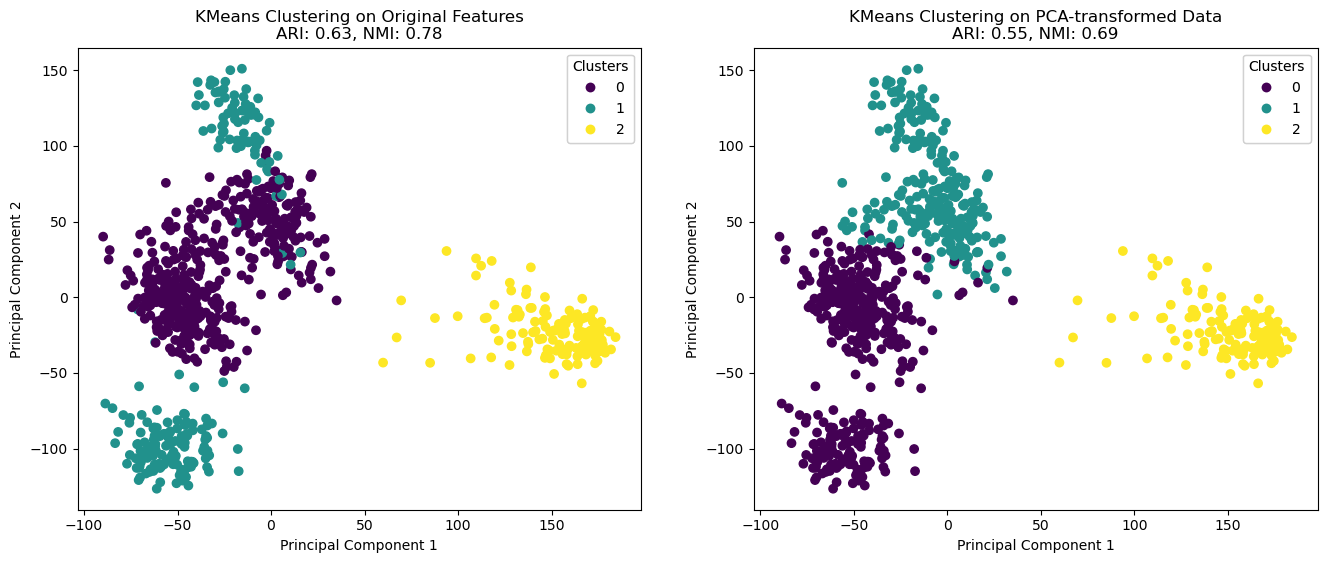

ARI for KMeans on original features: 0.6263284477721872
NMI for KMeans on original features: 0.7753475964578663
ARI for KMeans on PCA-transformed data: 0.5494642029209884
NMI for KMeans on PCA-transformed data: 0.6909457104981777


In [21]:
# Separate the features (genes) from the labels
features = merged_df.drop(columns=['Class'])
true_labels = merged_df['Class']

# Apply PCA to the features
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

# KMeans on original features
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(features)

# KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(principal_components)

# Compute ARI and NMI for KMeans on original features
ari_original = adjusted_rand_score(true_labels, clusters_original)
nmi_original = normalized_mutual_info_score(true_labels, clusters_original)

# Compute ARI and NMI for KMeans on PCA-transformed data
ari_pca = adjusted_rand_score(true_labels, clusters_pca)
nmi_pca = normalized_mutual_info_score(true_labels, clusters_pca)

# Plotting KMeans on original features
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

scatter = ax[0].scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_original, cmap='viridis')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend1)
ax[0].set_title('KMeans Clustering on Original Features\nARI: {:.2f}, NMI: {:.2f}'.format(ari_original, nmi_original))
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plotting KMeans on PCA-transformed data
scatter = ax[1].scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_pca, cmap='viridis')
legend2 = ax[1].legend(*scatter.legend_elements(), title="Clusters")
ax[1].add_artist(legend2)
ax[1].set_title('KMeans Clustering on PCA-transformed Data\nARI: {:.2f}, NMI: {:.2f}'.format(ari_pca, nmi_pca))
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.show()

print(f"ARI for KMeans on original features: {ari_original}")
print(f"NMI for KMeans on original features: {nmi_original}")
print(f"ARI for KMeans on PCA-transformed data: {ari_pca}")
print(f"NMI for KMeans on PCA-transformed data: {nmi_pca}")


Higher ARI and NMI for Original Features: If the ARI and NMI values are higher for the original features, it suggests that the original high-dimensional data contains more detailed information that KMeans can use to form clusters closely matching the true labels. However, this might come at the cost of computational complexity.
Following results from the analysis:
ARI for KMeans on original features: 0.63
NMI for KMeans on original features: 0.76
ARI for KMeans on PCA-transformed data: 0.55
NMI for KMeans on PCA-transformed data: 0.69
In this example, the ARI and NMI values are slightly higher for the original features, indicating that KMeans clustering aligns more closely with the true labels when using the full set of gene expression data. The PCA-transformed data still provides good clustering results, as the ARI and NMI values are relatively high, but slightly lower than the original features. This suggests that PCA retains most of the relevant information but might lose some fine details present in the original data. Ultimately, the choice between using original features and PCA-transformed data depends on the trade-off between computational efficiency and clustering accuracy. PCA can significantly reduce dimensionality and computational cost while still providing good clustering performance, especially when dealing with very high-dimensional data like gene expression profiles.